In [18]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = '/Users/lakshay/Desktop/graucia/loblaws.xlsx'
df = pd.read_excel(file_path, sheet_name='E Comm')  # Load the E Comm sheet


In [19]:

# Display the first few rows of the dataframe to understand its structure
print(df.head())
print(df.columns)

# Data Cleaning
# Handle missing values
df.fillna(df.median(numeric_only=True), inplace=True)  # Fill numerical NaNs with median
df.fillna(df.mode().iloc[0], inplace=True)  # Fill categorical NaNs with mode


   CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  Number

In [20]:
# Ensure Churn is treated as a categorical variable
df['Churn'] = df['Churn'].astype(int)

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)

# Encode categorical columns
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
for col in categorical_columns:
    df[col] = label_encoder.fit_transform(df[col])

# Identify numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns
print("Numerical columns:", numerical_columns)

Categorical columns: Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')
Numerical columns: Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')


         CustomerID        Churn       Tenure  PreferredLoginDevice  \
count   5630.000000  5630.000000  5630.000000           5630.000000   
mean   52815.500000     0.168384    10.134103              0.928419   
std     1625.385339     0.374240     8.357951              0.709822   
min    50001.000000     0.000000     0.000000              0.000000   
25%    51408.250000     0.000000     3.000000              0.000000   
50%    52815.500000     0.000000     9.000000              1.000000   
75%    54222.750000     0.000000    15.000000              1.000000   
max    55630.000000     1.000000    61.000000              2.000000   

          CityTier  WarehouseToHome  PreferredPaymentMode       Gender  \
count  5630.000000      5630.000000           5630.000000  5630.000000   
mean      1.654707        15.566785              3.548135     0.601066   
std       0.915389         8.345961              1.389659     0.489723   
min       1.000000         5.000000              0.000000     0.

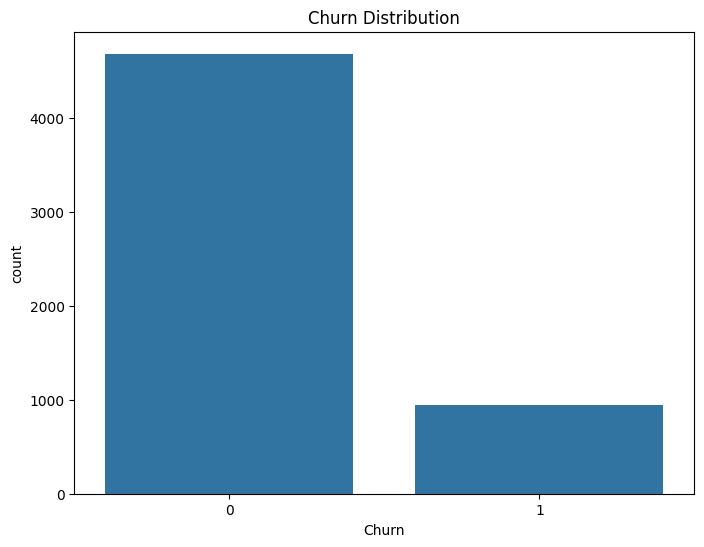

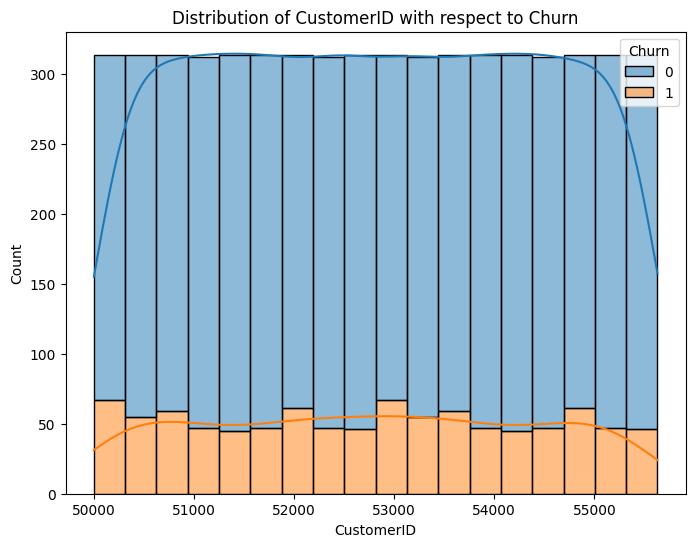

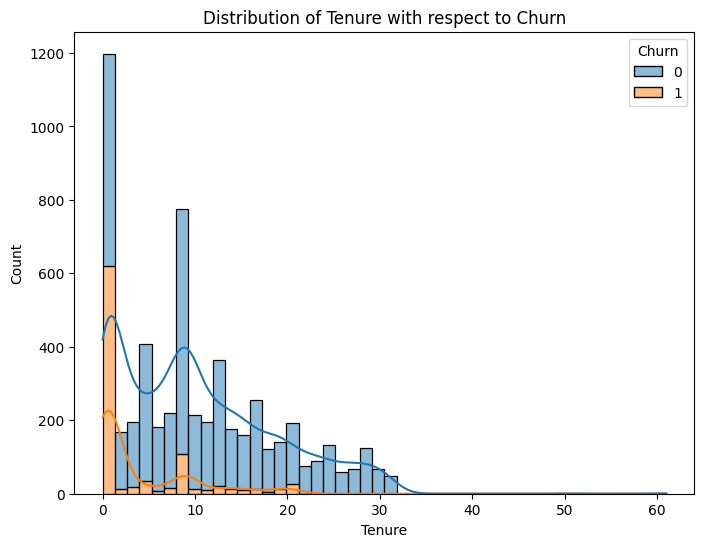

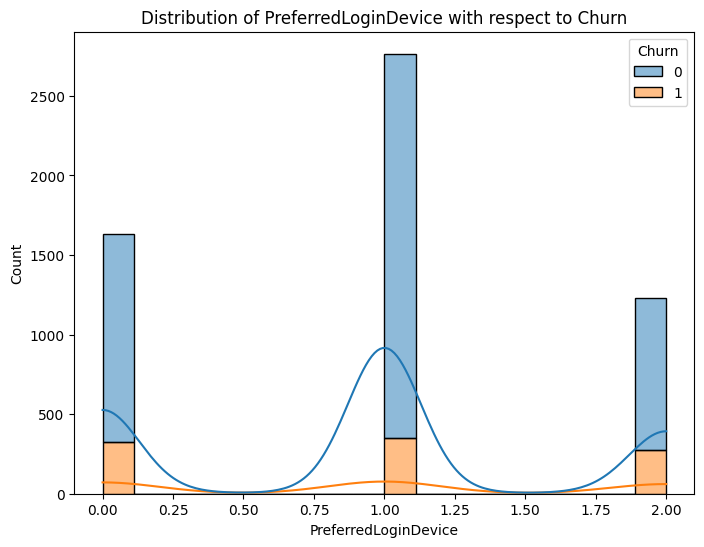

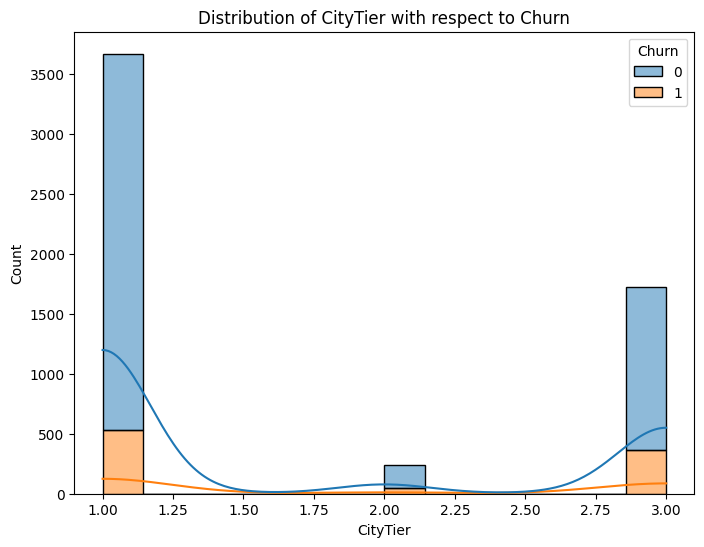

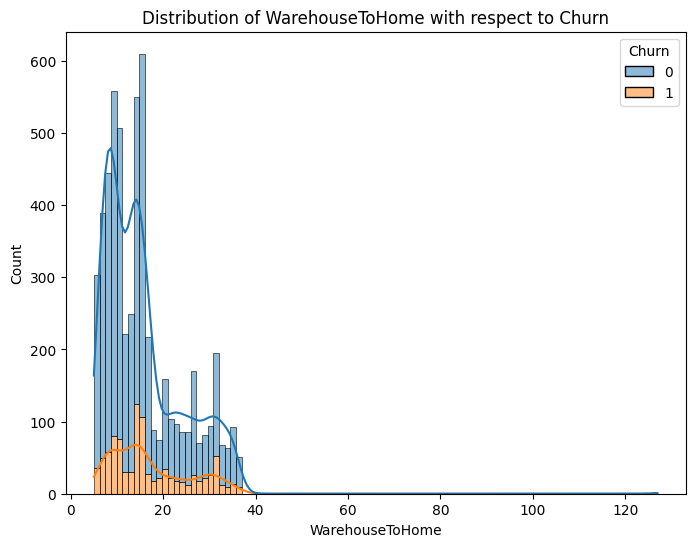

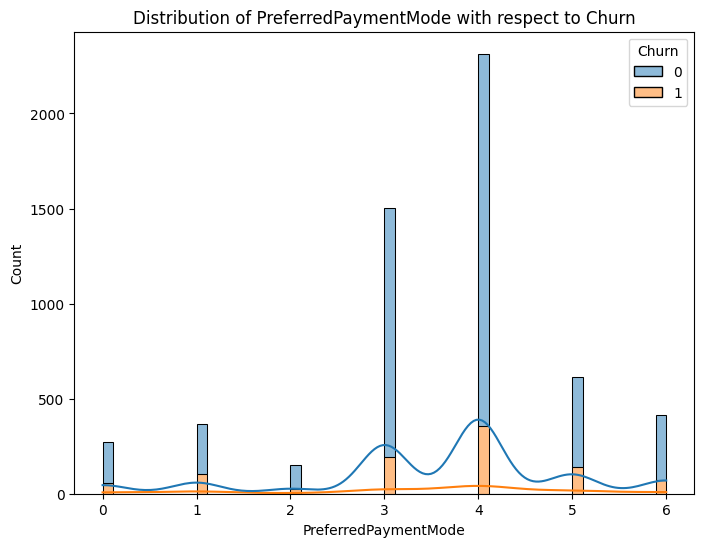

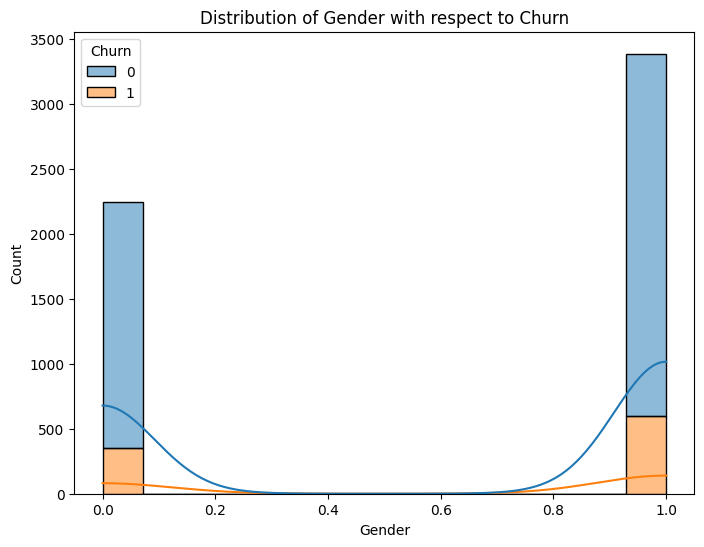

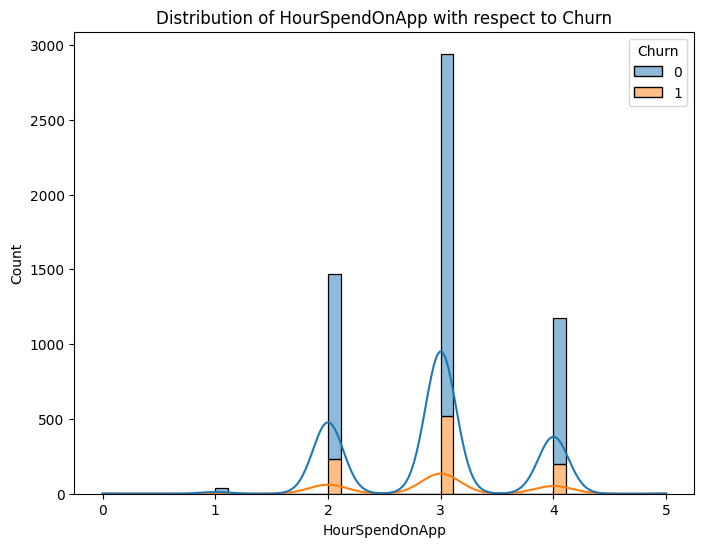

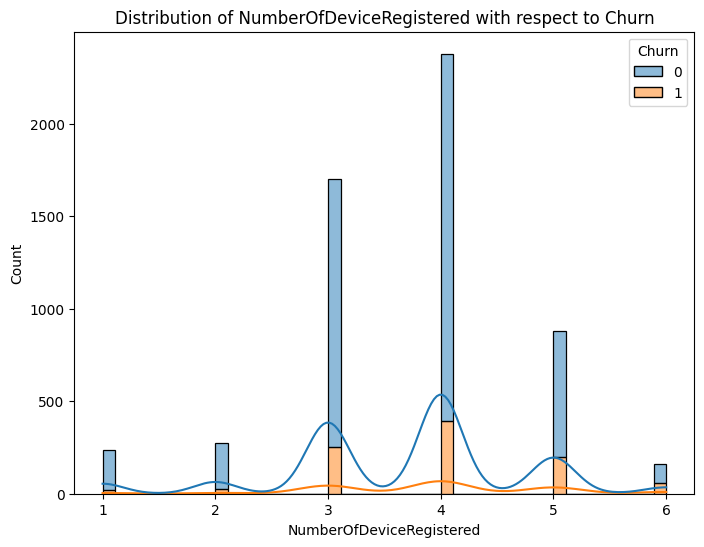

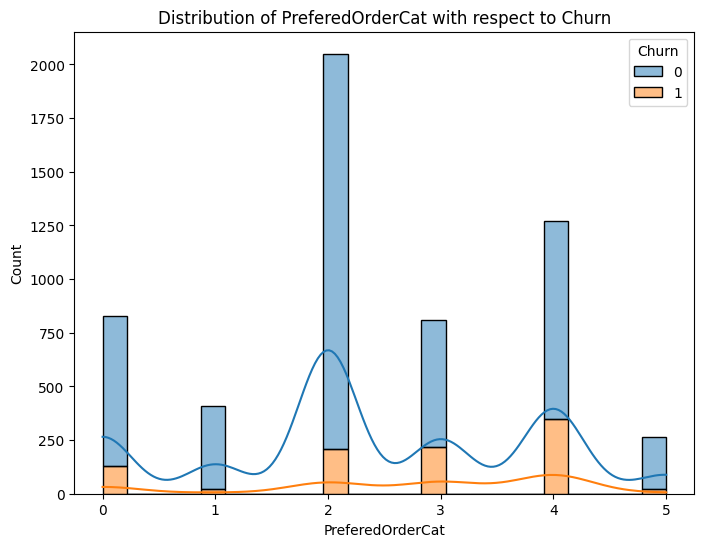

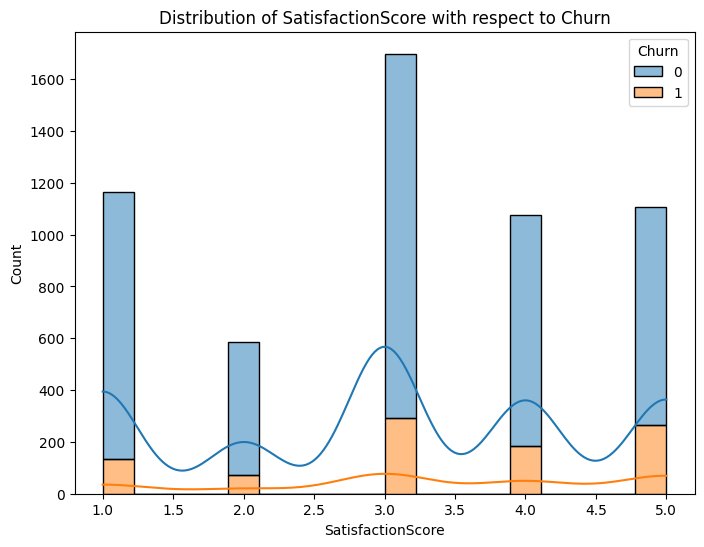

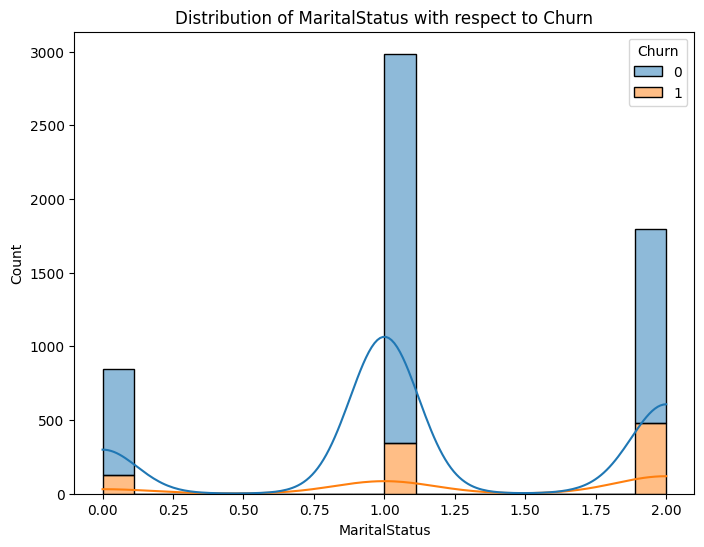

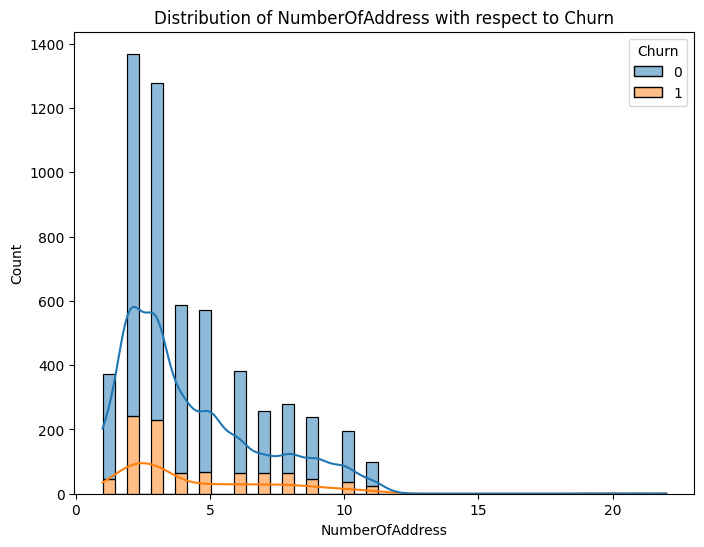

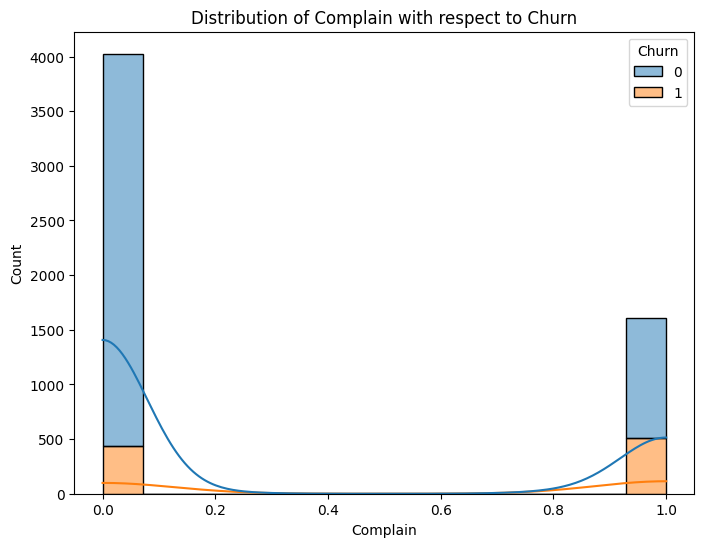

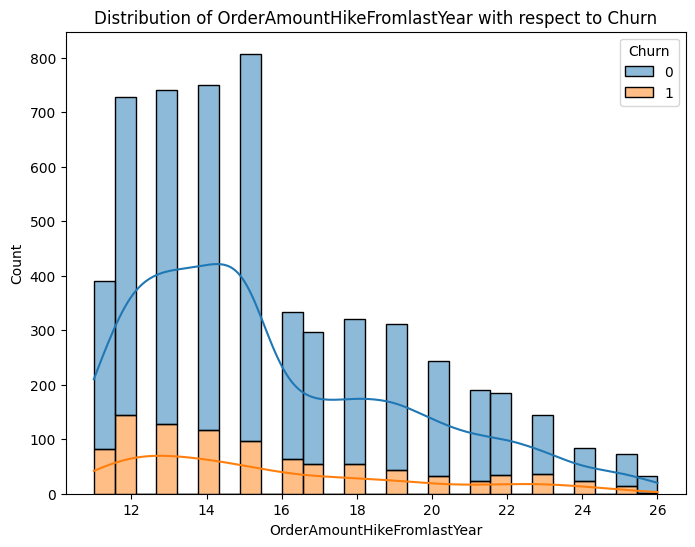

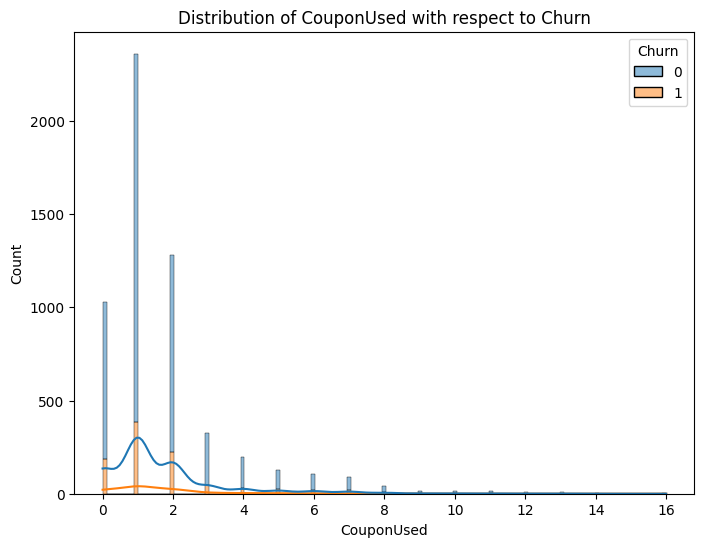

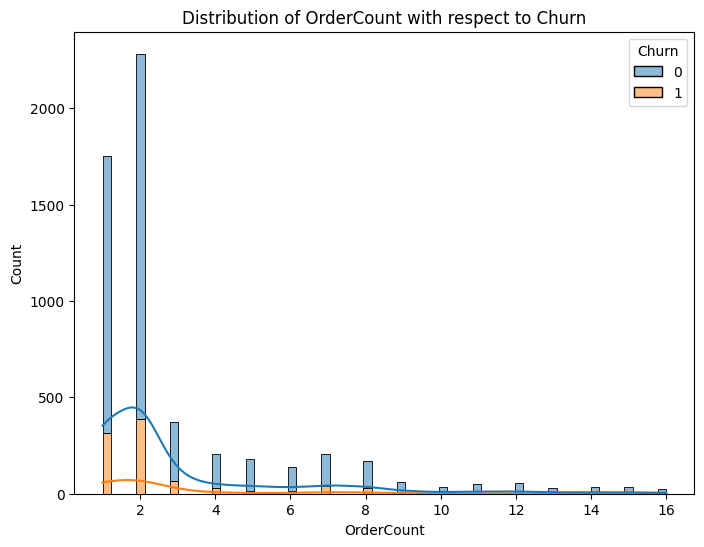

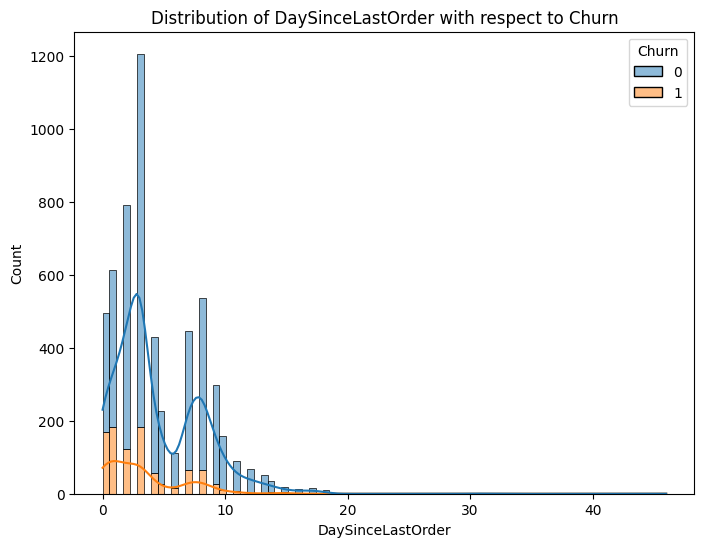

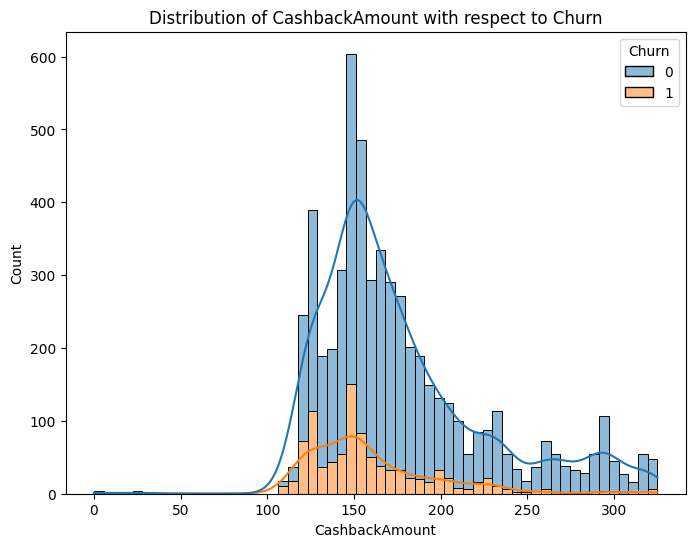

In [21]:
# Descriptive Statistics
print(df.describe())

# Churn Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

# Feature Distributions with respect to Churn
for column in df.columns:
    if column != 'Churn':
        plt.figure(figsize=(8, 6))
        sns.histplot(data=df, x=column, hue='Churn', multiple='stack', kde=True)
        plt.title(f'Distribution of {column} with respect to Churn')
        plt.show()

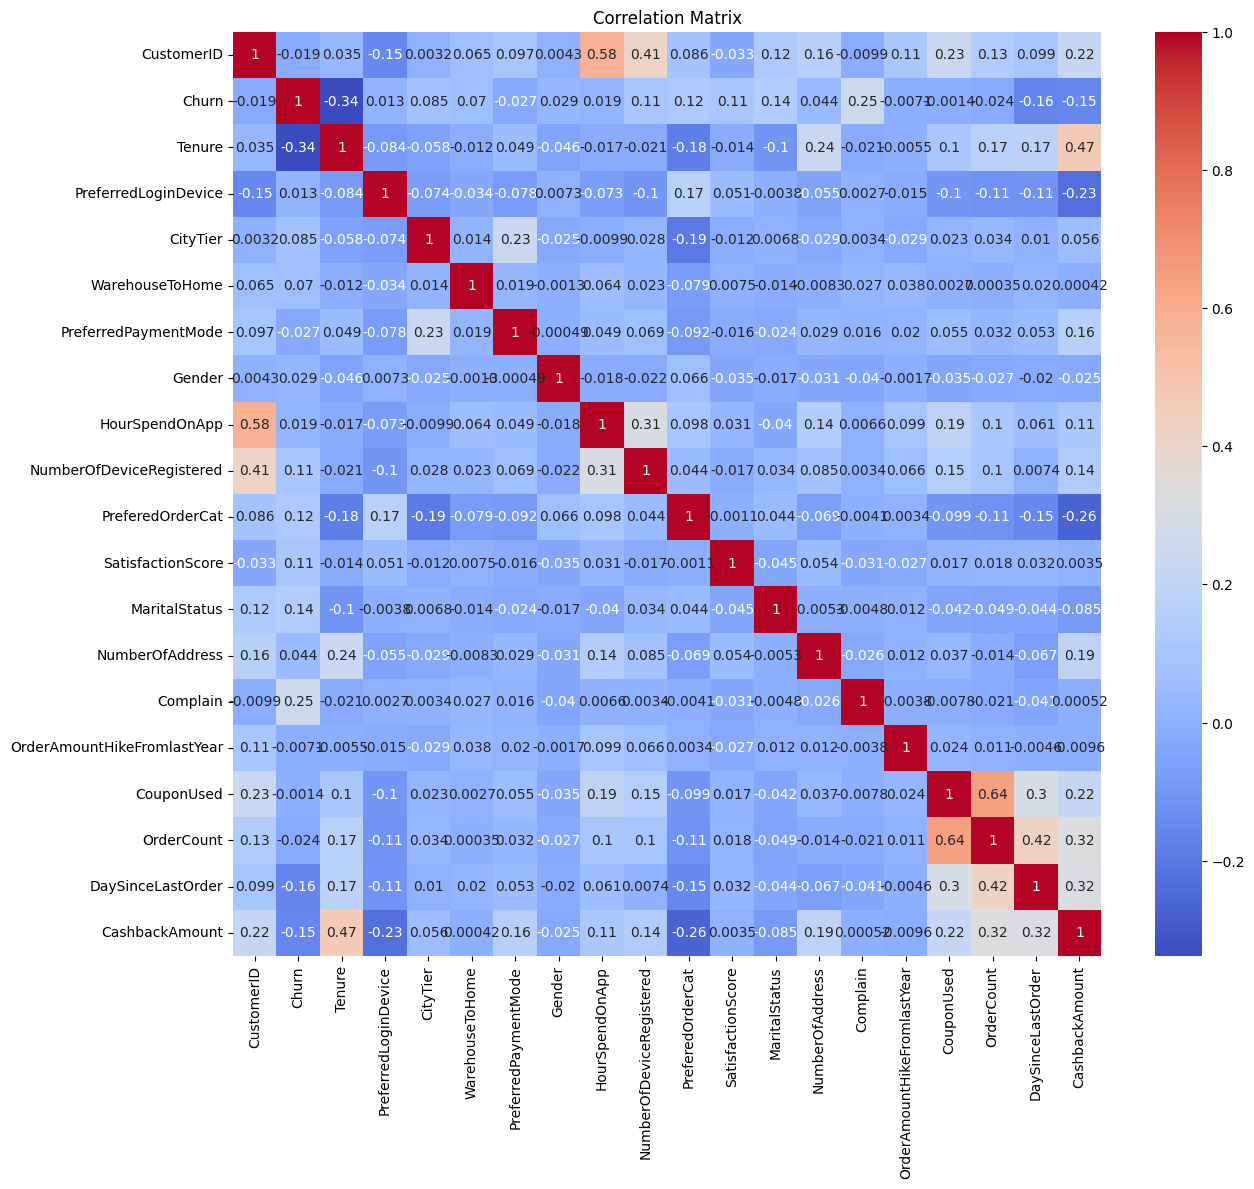

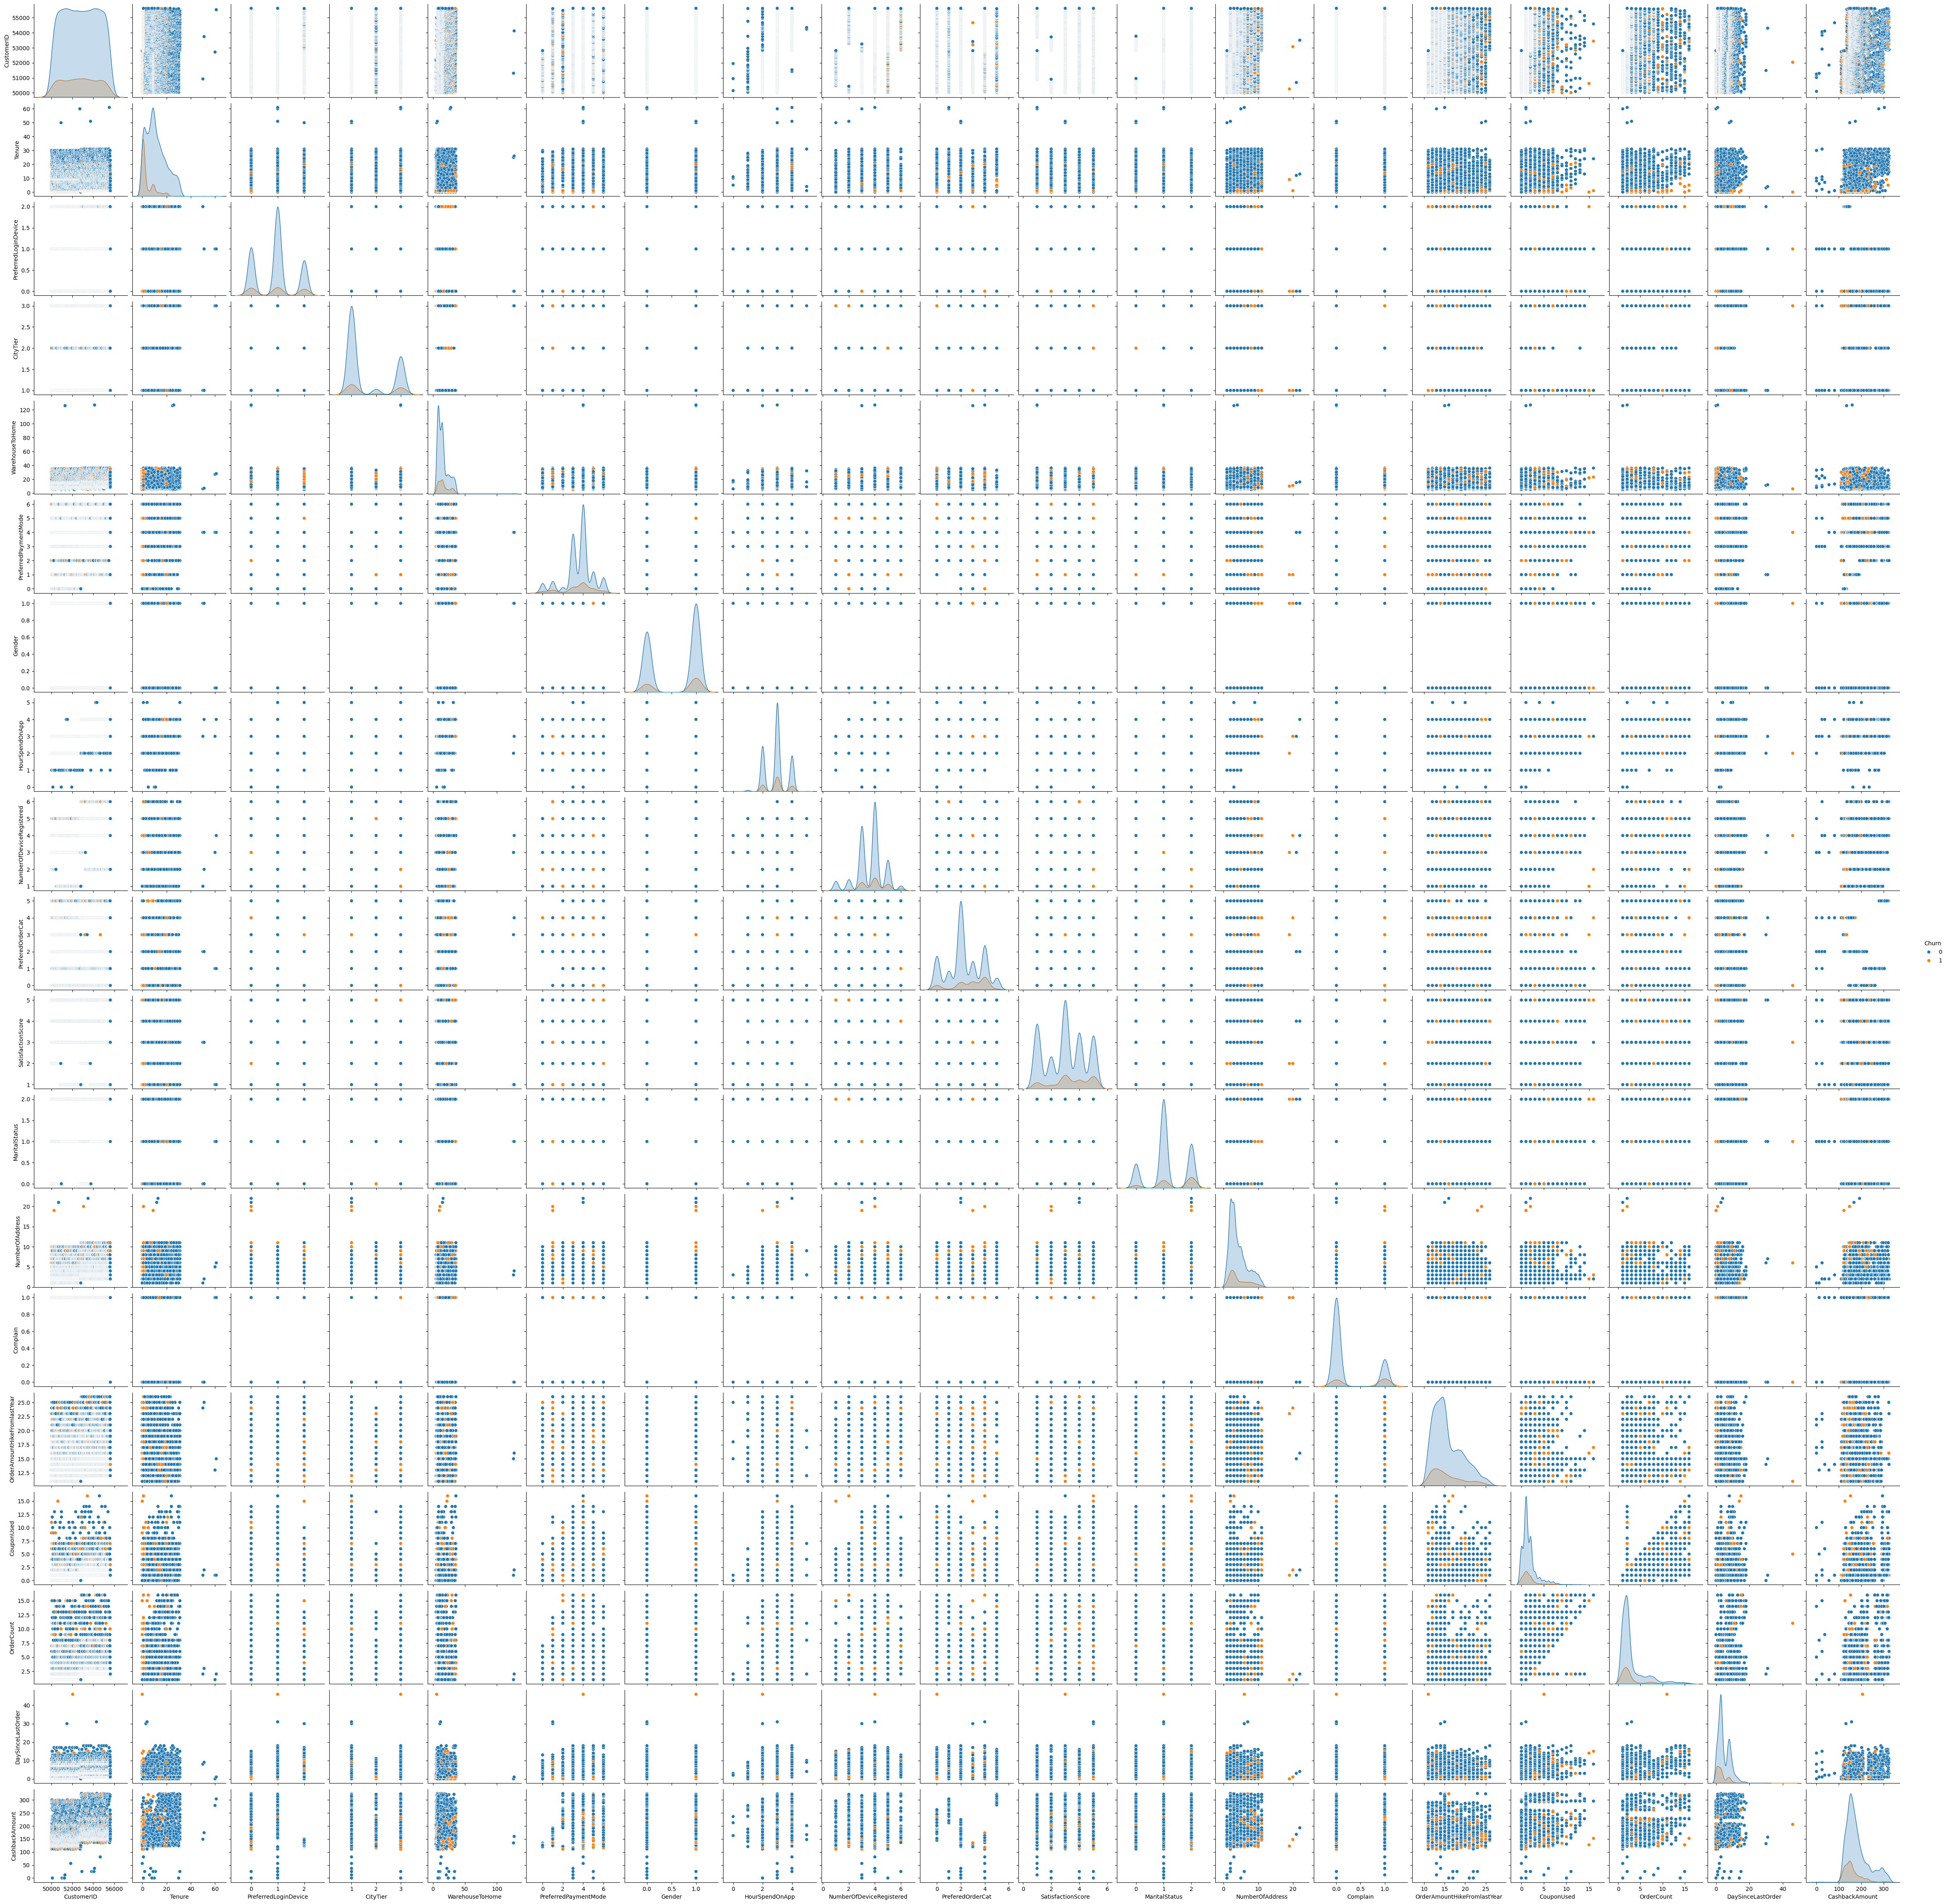

In [22]:
# Correlation Matrix
plt.figure(figsize=(14, 12))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Pair Plots
sns.pairplot(df, hue='Churn', diag_kind='kde')
plt.show()


In [23]:
# Further EDA based on feature importance
import shap

# Data Splitting
X = df.drop('Churn', axis=1)
y = df['Churn']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Training
from sklearn.ensemble import RandomForestClassifier
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)

RandomForestClassifier()

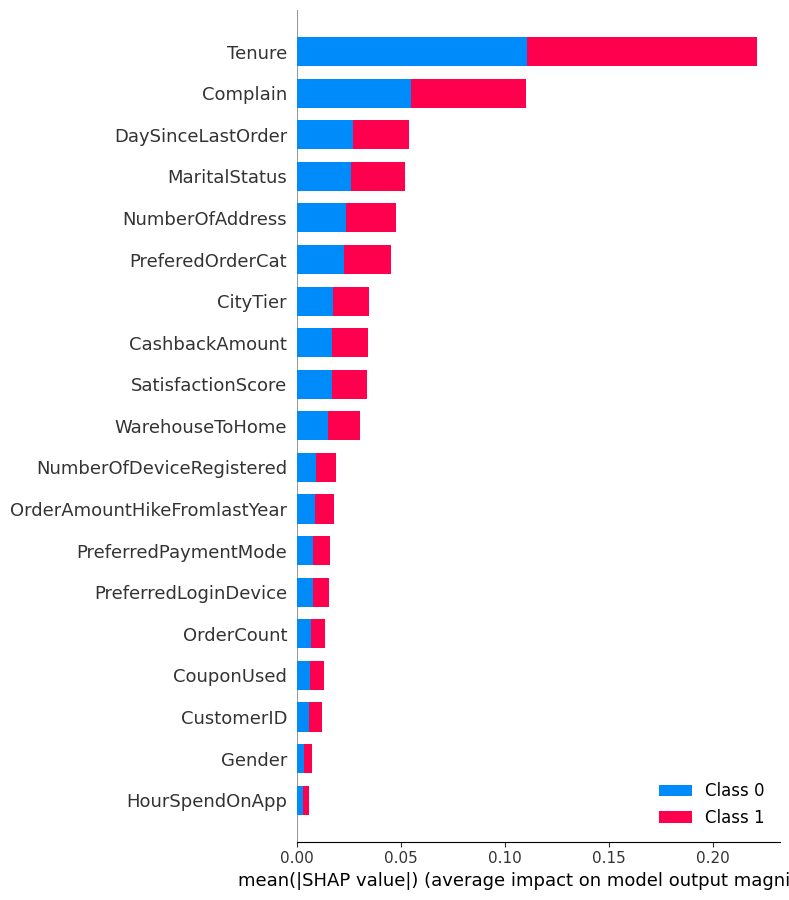

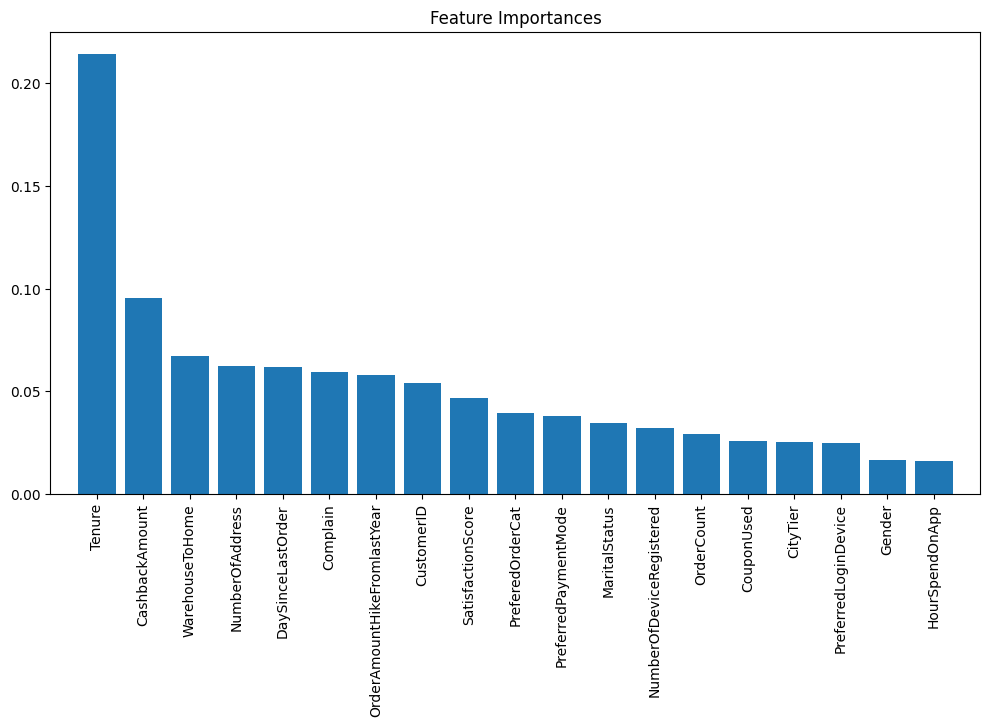

In [24]:

# SHAP for Model Interpretation
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

# Feature Importance from Random Forest
importances = best_model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot the feature importances
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(X_train.shape[1]), importances[indices], align="center")
plt.xticks(range(X_train.shape[1]), X_train.columns[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.show()
